In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import plotly.graph_objects as go

In [4]:
usb_path = "../../../"

In [5]:
#load campaign finance for candidates
columns_campfin22_cands22 = ['cycle', 'feccandid', 'cid', 'firstlastp', 'party', 'distidrunfor', 
                    'distidcurr', 'currcand', 'cyclecand', 'crpico', 'recipcode', 
                    'nopacs']
columns_campfin22_cands22 = dict(enumerate(columns_campfin22_cands22))

df_cand = pd.read_csv(usb_path + 'CampaignFin22/cands22.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'])
df_cand = df_cand.rename(columns=columns_campfin22_cands22)
df_cand = df_cand.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)
df_cand.head()

,cycle,feccandid,cid,firstlastp,party,distidrunfor,distidcurr,currcand,cyclecand,crpico,recipcode,nopacs
0,2022,H0AK00105,N00039029,Thomas Lamb (3),3,AK01,,,,,3N,
1,2022,H0AL01055,N00044245,Jerry Carl (R),R,AL01,AL01,Y,Y,I,RW,
2,2022,H0AL01063,N00044288,Wes Lambert (R),R,AL01,,,,,RN,
3,2022,H0AL01097,N00044750,James Averhart (D),D,AL01,,,,,DN,
4,2022,H0AL02087,N00030768,Martha Roby (R),R,AL02,,,,,RN,


In [6]:
#load campaign finance for pacs
columns_campfin22_pacs22 = ['cycle', 'fecrecno', 'pacid', 'cid', 'amount', 'date', 'realcode', 
                            'type', 'di', 'feccandid']
columns_campfin22_pacs22 = dict(enumerate(columns_campfin22_pacs22))

df_pacs = pd.read_csv(usb_path + 'CampaignFin22/pacs22.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'])

df_pacs = df_pacs.rename(columns=columns_campfin22_pacs22)
df_pacs = df_pacs.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)
df_pacs.head()

,cycle,fecrecno,pacid,cid,amount,date,realcode,type,di,feccandid
0,2022,1011020220264924462,C00406124,N00029513,500,10/18/2021,B4000,24K,D,H8IN07184
1,2022,1011320230265253020,C00032979,N00041569,-2500,11/21/2022,Z9600,24K,D,H8IL14174
2,2022,1011320230265254779,C00032979,N00041511,-5000,11/18/2022,Z9600,24K,D,H8MN08043
3,2022,1011320230265254798,C00032979,N00035575,5000,11/03/2022,Z9600,24K,D,H4FL15155
4,2022,1011320230265254809,C00032979,N00041511,4000,11/03/2022,Z9600,24K,D,H8MN08043


In [7]:
#load campaign finance for committees
columns_campfin22_cmtes22 = ['cycle', 'cmteid', 'pacshort', 'affiliate', 'ultorg', 'recipid', 
                    'recipcode', 'feccandid', 'party', 'primcode', 'source', 'sensitive',
                    'foreign', 'active']
columns_campfin22_cmtes22 = dict(enumerate(columns_campfin22_cmtes22))
usb_path = "../../../"
df_cmt = pd.read_csv(usb_path + 'CampaignFin22/cmtes22.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'])
df_cmt = df_cmt.rename(columns=columns_campfin22_cmtes22)
df_cmt = df_cmt.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)
df_cmt.head()

,cycle,cmteid,pacshort,affiliate,ultorg,recipid,recipcode,feccandid,party,primcode,source,sensitive,foreign,active
0,2022,C00000059,Hallmark Cards,NaN,Hallmark Cards,C00000059,PB,NaN,NaN,C1400,WAA21,Y,0,1
1,2022,C00000422,American Medical Assn,American Medical Assn,American Medical Assn,C00000422,PB,NaN,NaN,H1100,WAA21,n,0,1
2,2022,C00000489,Teamsters Local 886,Teamsters Union,Teamsters Union,C00000489,PL,NaN,,LT300,WAA21,n,0,1
3,2022,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMIT...,NaN,NaN,C00000547,NaN,NaN,U,NaN,NaN,NaN,0,0
4,2022,C00000729,American Dental Assn,American Dental Assn,American Dental Assn,C00000729,PB,NaN,NaN,H1400,WAA21,n,0,1


In [8]:
#find candidates on the ways and means committee
ways_and_means_members = ["Earl Blumenauer", "Don Beyer"]
df_cand['firstlastp'] = df_cand['firstlastp'].apply(lambda x: ' '.join(x.split()[:2]))
df_cand_filt = df_cand[df_cand['firstlastp'].isin(ways_and_means_members)]
df_cand_filt.head()

,cycle,feccandid,cid,firstlastp,party,distidrunfor,distidcurr,currcand,cyclecand,crpico,recipcode,nopacs
5031,2022,H4VA08224,N00036018,Don Beyer,D,VA08,VA08,Y,Y,I,DW,
5294,2022,H6OR03064,N00007727,Earl Blumenauer,D,OR03,OR03,Y,Y,I,DW,


In [9]:
#Ways and Means PACs
df_pacs_wm = df_pacs.merge(df_cand_filt.set_index('feccandid'), on=['feccandid', 'cid'])
df_pacs_wm.head()

,cycle_x,fecrecno,pacid,cid,amount,date,realcode,type,di,feccandid,cycle_y,firstlastp,party,distidrunfor,distidcurr,currcand,cyclecand,crpico,recipcode,nopacs
0,2022,1081920220264974933,C00024521,N00036018,3000,07/29/2022,K1100,24K,D,H4VA08224,2022,Don Beyer,D,VA08,VA08,Y,Y,I,DW,
1,2022,4010420231646811157,C00433482,N00036018,1000,11/01/2022,C5400,24K,D,H4VA08224,2022,Don Beyer,D,VA08,VA08,Y,Y,I,DW,
2,2022,4010420231665460861,C00325092,N00036018,1000,10/27/2022,D5000,24K,D,H4VA08224,2022,Don Beyer,D,VA08,VA08,Y,Y,I,DW,
3,2022,4010520231666136221,C00004036,N00036018,2500,09/27/2022,LG300,24K,D,H4VA08224,2022,Don Beyer,D,VA08,VA08,Y,Y,I,DW,
4,2022,4010920231666588681,C00318311,N00036018,500,11/07/2022,L1100,24K,D,H4VA08224,2022,Don Beyer,D,VA08,VA08,Y,Y,I,DW,


In [10]:
#merge pac information with candidate personal identifiers
df_cmt_filt = df_cmt[["cmteid", "pacshort", "affiliate", "ultorg", "primcode"]]
df_pacs_wm_cmt = df_pacs_wm.merge(df_cmt_filt.set_index('cmteid'), left_on='pacid', right_on='cmteid')
df_pacs_wm_cmt["quarter"] = pd.to_datetime(df_pacs_wm_cmt["date"]).dt.to_period("Q")
df_pacs_wm_cmt["year"] = pd.to_datetime(df_pacs_wm_cmt["date"]).dt.year
df_pacs_wm_cmt[["pacid", "pacshort", "ultorg", "cid", "firstlastp", "party", "date", "year", "quarter", "amount"]]

,pacid,pacshort,ultorg,cid,firstlastp,party,date,year,quarter,amount
0,C00024521,American Assn for Justice,American Assn for Justice,N00036018,Don Beyer,D,07/29/2022,2022,2022Q3,3000
1,C00024521,American Assn for Justice,American Assn for Justice,N00036018,Don Beyer,D,04/13/2021,2021,2021Q2,1000
2,C00024521,American Assn for Justice,American Assn for Justice,N00036018,Don Beyer,D,05/05/2021,2021,2021Q2,1000
3,C00024521,American Assn for Justice,American Assn for Justice,N00036018,Don Beyer,D,09/08/2021,2021,2021Q3,3000
4,C00024521,American Assn for Justice,American Assn for Justice,N00036018,Don Beyer,D,09/08/2021,2021,2021Q3,2000
...,...,...,...,...,...,...,...,...,...,...
735,C00032979,Teamsters Union,Teamsters Union,N00007727,Earl Blumenauer,D,11/30/2021,2021,2021Q4,5000
736,C00007070,Texas Instruments,Texas Instruments,N00007727,Earl Blumenauer,D,10/11/2022,2022,2022Q4,2000
737,C00164145,USAA,USAA,N00007727,Earl Blumenauer,D,09/26/2022,2022,2022Q3,2500
738,C00017525,American Nurses Assn,American Nurses Assn,N00007727,Earl Blumenauer,D,10/06/2022,2022,2022Q4,2500


In [11]:
#group pac committee contributions by candidate and quarter
df_pacs_wm_cmt_agg = df_pacs_wm_cmt.groupby(['ultorg', "cid", 'firstlastp', "year", "quarter"])["amount"].sum().reset_index().sort_values(by='amount', ascending=False)

In [12]:
df_pacs_wm_cmt_agg.head()

,ultorg,cid,firstlastp,year,quarter,amount
566,PeopleForBikes,N00007727,Earl Blumenauer,2021,2021Q3,10000
613,SpaceX,N00036018,Don Beyer,2021,2021Q2,10000
282,ESOP Assn,N00036018,Don Beyer,2022,2022Q2,10000
356,Humane Society of the US,N00007727,Earl Blumenauer,2022,2022Q4,7599
202,Blue Cross/Blue Shield,N00007727,Earl Blumenauer,2021,2021Q3,6000


In [13]:
df_pacs_wm_cmt_agg = df_pacs_wm_cmt_agg.groupby(['ultorg','firstlastp'])["amount"].sum().reset_index().sort_values(by='amount', ascending=False)

In [14]:
# Dataset description:d
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20lob_lobbying.htm
columns_lob_lobbying = ['uniqid', 'registrant_raw', 'registrant', 'isfirm', 
                     'client_raw', 'client', 'ultorg', 'amount', 'catcode',
                     'source', 'self', 'includensfs', 'use', 'ind', 'year',
                     'type', 'typelong', 'affiliate']

columns_lob_lobbying = dict(enumerate(columns_lob_lobbying))

df_lobbying = pd.read_csv('../../data/open_secrets/Lobby/lob_lobbying.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_lobbying = df_lobbying.rename(columns=columns_lob_lobbying)
df_lobbying = df_lobbying.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)

/var/folders/g1/9sc25jzn7fdgvxb50169_b9m0000gn/T/ipykernel_7660/2194844689.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lobbying = pd.read_csv('../../data/open_secrets/Lobby/lob_lobbying.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')


In [15]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20lob_issues.htm
columns_lob_issue = ['si_id', 'uniqid', 'issueid', 'issue', 'specificissue', 5, 6, 7, 8, 9, 10, 'year']
columns_lob_issue = dict(enumerate(columns_lob_issue))
df_issue = pd.read_csv('../../data/open_secrets/Lobby/lob_issue.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_issue = df_issue.rename(columns=columns_lob_issue)
df_issue = df_issue.applymap(lambda x: x.replace('|', '') if type(x) == str else x)

# Other cleanup.
df_issue['year'] = pd.to_numeric(df_issue['year'], errors='coerce')
df_issue = df_issue.dropna(subset=['year'])
df_issue['year'] = df_issue['year'].astype(int)

/var/folders/g1/9sc25jzn7fdgvxb50169_b9m0000gn/T/ipykernel_7660/3147263925.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_issue = pd.read_csv('../../data/open_secrets/Lobby/lob_issue.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')


In [16]:
# Dataset description:
# https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20lob_bills.htm
columns_lob_bills = ['b_id', 'si_id', 'congno', 'bill_name']

columns_lob_bills = dict(enumerate(columns_lob_bills))
df_bills = pd.read_csv('../../data/open_secrets/Lobby/lob_bills.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_bills = df_bills.rename(columns=columns_lob_bills)
# Get rid of the pipes on both sides of the data.
df_bills = df_bills.applymap(lambda x: x.replace('|', '') if type(x) == str else x)

# Other cleanup.
df_bills['congno'] = pd.to_numeric(df_bills['congno'], errors='coerce')
df_bills = df_bills.dropna(subset=['congno'])
df_bills['congno'] = df_bills['congno'].astype(int)

In [17]:
df_bills.head()

,b_id,si_id,congno,bill_name
0,s1461-117,2820018,117,S.1461
1,hr463-117,2820018,117,H.R.463
2,s910-116,2820035,116,S.910
3,hr2405-116,2820035,116,H.R.2405
4,hr3816-117,2820067,117,H.R.3816


In [340]:
df_issue.head()

,si_id,uniqid,issueid,issue,specificissue,5,6,7,8,9,10,year
0,3001624,02e92bd6-0159-495e-9d00-8a490a0be8be,DIS,Disaster & Emergency Planning,Issues affecting manufacturer of railroad and ...,environmental,transportation,trade,labor,shipping,disaster planning and tax issues.,2022
1,3001625,02e92bd6-0159-495e-9d00-8a490a0be8be,ENV,Environment & Superfund,Issues affecting manufacturer of railroad and ...,environmental,transportation,trade,labor,shipping,disaster planning and tax issues.,2022
2,3001627,02e92bd6-0159-495e-9d00-8a490a0be8be,ROD,Roads & Highways,Issues affecting manufacturer of railroad and ...,environmental,transportation,trade,labor,shipping,disaster planning and tax issues.,2022
3,3001628,02e92bd6-0159-495e-9d00-8a490a0be8be,RRR,Railroads,Issues affecting manufacturer of railroad and ...,environmental,transportation,trade,labor,shipping,disaster planning and tax issues.,2022
4,3001629,02e92bd6-0159-495e-9d00-8a490a0be8be,TAX,Taxes,Issues affecting manufacturer of railroad and ...,environmental,transportation,trade,labor,shipping,disaster planning and tax issues.,2022


In [238]:
df_lobbying.head()

,uniqid,registrant_raw,registrant,isfirm,client_raw,client,ultorg,amount,catcode,source,self,includensfs,use,ind,year,type,typelong,affiliate
0,82c5f661-a637-45ad-a3a6-b5ba18cf8962,ASTRAZENECA PHARMACEUTICALS LP,AstraZeneca Pharmaceuticals,NaN,ASTRAZENECA PHARMACEUTICALS LP,AstraZeneca Pharmaceuticals,AstraZeneca PLC,1370000.0,H4300,pac,x,,y,y,2021,q4a,FOURTH QUARTER AMENDMENT,
1,85b111b1-5d2e-4107-bc24-0921316e29a5,ECHELON GOVERNMENT AFFAIRS,Echelon Government Affairs,y,THE ALBERS GROUP,Albers Group,Albers Group,10000.0,Y4000,,n,,y,y,2021,q4,FOURTH QUARTER REPORT,
2,87822a14-12de-478c-a34d-010fa503e539,WTA -- ADVOCATES FOR RURAL BROADBAND,Western Telecommunications Alliance,NaN,WTA -- ADVOCATES FOR RURAL BROADBAND,Western Telecommunications Alliance,Western Telecommunications Alliance,75000.0,C4000,pac,p,,y,y,2021,q4,FOURTH QUARTER REPORT,
3,87ff989d-9d12-4fef-84ef-ab69cd616894,FINANCIAL EXECUTIVES INTERNATIONAL,Financial Executives International,NaN,FINANCIAL EXECUTIVES INTERNATIONAL,Financial Executives International,Financial Executives International,21650.0,F5000,Hvr06,p,,y,y,2021,q4,FOURTH QUARTER REPORT,
4,88bac485-00bb-4915-8ca5-8d0ec589ec28,CAPITOL HILL CONSULTING GROUP,Capitol Hill Consulting Group,y,ASSOCIATION FOR ACCESSIBLE MEDICINES (FORMERLY...,Association for Accessible Medicines,Association for Accessible Medicines,40000.0,H4300,pac,i,,y,,2021,q4,FOURTH QUARTER REPORT,


In [18]:
#load lobbying firms to agencies
columns_lob_agency = ['uniqid', 'agencyid', 'agency']
columns_lob_agency = dict(enumerate(columns_lob_agency))

df_agency = pd.read_csv('../../data/open_secrets/Lobby/lob_agency.csv', on_bad_lines='skip', sep=',', header=None, na_values=['N/A', 'NA'], encoding='ISO-8859-1')
df_agency = df_agency.rename(columns=columns_lob_agency)
df_agency = df_agency.applymap(lambda x: x.strip('|') if isinstance(x, str) else x)

In [19]:
#find how many companies who finance campaigns also lobby
companies_in_both = (set(df_lobbying["registrant"]).intersection(set(df_pacs_wm_cmt["ultorg"])))
companies_no_lobbying = set(df_pacs_wm_cmt["ultorg"]).difference(set(df_lobbying["registrant"]))
print(len(companies_no_lobbying))
print(len(companies_in_both))
print("Percentage of companies that finance campaigns who also lobby: ",)
print(len(companies_in_both) / (len(companies_in_both) + len(companies_no_lobbying)))

92
232
Percentage of companies that finance campaigns who also lobby: 
0.7160493827160493


In [20]:
#get earliest financial contributions to committee members
min_quarter = df_pacs_wm_cmt_agg["quarter"].min()
min_quarter

KeyError: 'quarter'

In [ ]:
w_m_dems = ["Richard Neal",
"Brad Schneider",
"Jimmy Panetta",
"Bill Pascrell",
"Linda Sánchez",
"Terri Sewell",
"Gwen Moore",
"Tom Suozzi",
"Mike Thompson",
"John Larson",
"Stephanie Murphy",
"Donald Beyer",
"Earl Blumenauer",
"Brendan Boyle",
"Judy Chu",
"Danny Davis",
"Suzan DelBene",
"Lloyd Doggett",
"Dwight Evans",
"Jimmy Gomez",
"Brian Higgins",
"Steven Horsford",
"Dan Kildee",
"Ronald Kind"]

w_m_dems = pd.DataFrame(w_m_dems, columns=["firstlastp"])
w_m_dems.merge(df_cand, on="firstlastp", how="left")

,firstlastp,cycle,feccandid,cid,party,distidrunfor,distidcurr,currcand,cyclecand,crpico,recipcode,nopacs
0,Richard Neal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brad Schneider,2022,H2IL10068,N00033101,D,IL10,IL10,Y,Y,I,DW,
2,Jimmy Panetta,2022,H6CA20152,N00038601,D,CA19,CA20,Y,Y,I,DW,
3,Bill Pascrell,2022,H6NJ08118,N00000751,D,NJ09,NJ09,Y,Y,I,DW,
4,Linda Sánchez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Terri Sewell,2022,H0AL07086,N00030622,D,AL07,AL07,Y,Y,I,DW,
6,Gwen Moore,2022,H4WI04183,N00026914,D,WI04,WI04,Y,Y,I,DW,
7,Tom Suozzi,2022,H6NY03247,N00038742,D,NY03,NY03,,,I,DI,
8,Mike Thompson,2022,H8CA01109,N00007419,D,CA04,CA05,Y,Y,I,DW,
9,John Larson,2022,H8CT01046,N00000575,D,CT01,CT01,Y,Y,I,DW,


In [21]:
wm_repub = ["Jason Smith", 
"Vern Buchanan",
"Kevin Hern",
"Lloyd Smucker",
"Mike Kelly",
"Nicole Malliotakis",
"Randy Feenstra",
"Jodey Arrington",
"Greg Steube",
"Ron Estes",
"Adrian Smith",
"Beth Van Duyne",
"Carol Miller",
"Michelle Fischbach",
"Michelle Steel",
"Mike Carey",
"Blake Moore",
"Brad Wenstrup",
"Brian Fitzpatrick",
"Claudia Tenney",
"Darin LaHood",
"David Kustoff",
"David Schweikert",
"Drew Ferguson",
"Gregory Murphy"]

wm_repub = pd.DataFrame(wm_repub, columns=["firstlastp"])
wm_repub["party"] = "R"
wm_repub.merge(df_cand, on=["firstlastp", "party"], how="left")

,firstlastp,party,cycle,feccandid,cid,distidrunfor,distidcurr,currcand,cyclecand,crpico,recipcode,nopacs
0,Jason Smith,R,2022,H4MO08162,N00035282,MO08,MO08,Y,Y,I,RW,
1,Vern Buchanan,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kevin Hern,R,2022,H8OK01157,N00040829,OK01,OK01,Y,Y,I,RW,
3,Lloyd Smucker,R,2022,H6PA16320,N00038781,PA11,PA11,Y,Y,I,RW,
4,Mike Kelly,R,2022,H0PA03271,N00031647,PA16,PA16,Y,Y,I,RW,
5,Nicole Malliotakis,R,2022,H0NY11078,N00044040,NY11,NY11,Y,Y,I,RW,
6,Randy Feenstra,R,2022,H0IA04145,N00044011,IA04,IA04,Y,Y,I,RW,
7,Jodey Arrington,R,2022,H6TX19099,N00038285,TX19,TX19,Y,Y,I,RW,
8,Greg Steube,R,2022,H8FL17053,N00042808,FL17,FL17,Y,Y,I,RW,
9,Ron Estes,R,2022,H8KS04112,N00040712,KS04,KS04,Y,Y,I,RW,


In [22]:
def finance_ways_means(df_cand, df_pacs, ways_and_means_members):
    df_cand['firstlastp'] = df_cand['firstlastp'].apply(lambda x: ' '.join(x.split()[:2]))
    df_cand_filt = df_cand[df_cand['firstlastp'].isin(ways_and_means_members)]

    df_pacs_wm = df_pacs.merge(df_cand_filt.set_index('feccandid'), on=['feccandid', 'cid'])

    #get pacs that have contributed to the ways and means committee
    df_cmt_filt = df_cmt[["cmteid", "pacshort", "affiliate", "ultorg", "primcode"]]
    df_pacs_wm_cmt = df_pacs_wm.merge(df_cmt_filt.set_index('cmteid'), left_on='pacid', right_on='cmteid')
    df_pacs_wm_cmt["quarter"] = pd.to_datetime(df_pacs_wm_cmt["date"]).dt.to_period("Q")
    df_pacs_wm_cmt["year"] = pd.to_datetime(df_pacs_wm_cmt["date"]).dt.year

    #get earliest financial contributions to committee members
    min_quarter = df_pacs_wm_cmt["quarter"].min()

    #get sum of pacs contributions to committee members
    df_pacs_wm_cmt_agg = df_pacs_wm_cmt.groupby(['ultorg', "cid", 'firstlastp'])["amount"].sum().reset_index().sort_values(by='amount', ascending=False)

    return df_pacs_wm_cmt_agg, min_quarter

    

In [23]:
def lobbying_committee(df_lobbying, df_agency, agency_id, df_pacs_wm_cmt, min_quarter):

    #process lobbying data for ways and means committee
    df_lobbying_filt = df_lobbying[["uniqid", "registrant", "client", "ultorg", "amount", "catcode", "year", "type"]]

    #only get lobbying firms lobbying house of representatives
    rep_lobbying = df_agency[df_agency["agencyid"] == agency_id]

    #merge agency data with general lobbying data
    df_lobbying_filt = df_lobbying_filt.merge(rep_lobbying.set_index('uniqid'), on='uniqid', how = "inner")

    df_lobbying_filt = df_lobbying_filt.merge(df_issue[["uniqid", "si_id"]], on='uniqid', how = "inner")

    df_lobbying_filt = df_lobbying_filt.merge(df_bills[["si_id", "b_id"]], on='si_id', how = "inner")

    #create quarter field and only include data from the earliest quarter of campaign finance data
    df_lobbying_filt['quarter'] =  df_lobbying_filt['year'].astype(str) + df_lobbying_filt['type'].str[:2].str.capitalize()
    df_lobbying_filt['quarter'] = pd.to_datetime(df_lobbying_filt['quarter'], errors='coerce').dt.to_period('Q-DEC')
    df_lobbying_filt = df_lobbying_filt[(df_lobbying_filt["quarter"] >= min_quarter)][["registrant", "ultorg", "amount", "quarter", "catcode", "b_id"]]

    #only include organizations that have contributed to the ways and means committee
    orgs = pd.DataFrame(df_pacs_wm_cmt["ultorg"].unique())
    orgs.columns = ["ultorg"]
    df_lobbying_filt = df_lobbying_filt.merge(orgs, on='ultorg', how='inner')
    df_lobbying_filt["amount"] = df_lobbying_filt["amount"].astype(float)

    #organizations that lobby non-zero amounts and have contributed to the ways and means committee
    df_lobbying_filt = df_lobbying_filt[df_lobbying_filt["amount"] > 0]

    return(df_lobbying_filt.groupby(["registrant","ultorg", "b_id"])["amount"].sum().reset_index())
    

In [54]:
df_finance_wm, min_quarter = finance_ways_means(df_cand, df_pacs, wm_repub["firstlastp"])
df_finance_wm

,ultorg,cid,firstlastp,amount
2973,House Majority PAC,N00006460,David Schweikert,1720471
574,American Dream Federal Action,N00006460,David Schweikert,500479
1835,Congressional Leadership Fund,N00006460,David Schweikert,460635
3567,Make America Great Again Action,N00048568,Mike Carey,417132
1043,Americans for Prosperity,N00006460,David Schweikert,330977
...,...,...,...,...
6057,WinRed,N00038781,Lloyd Smucker,-6035
6068,WinRed,N00048568,Mike Carey,-6121
6063,WinRed,N00044011,Randy Feenstra,-6258
6064,WinRed,N00044040,Nicole Malliotakis,-28845


In [55]:
df_lobbying_wm = lobbying_committee(df_lobbying, df_agency, "002 ", df_finance_wm, min_quarter)
df_lobbying_wm.head()

/var/folders/g1/9sc25jzn7fdgvxb50169_b9m0000gn/T/ipykernel_7660/50407524.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_lobbying_filt['quarter'] = pd.to_datetime(df_lobbying_filt['quarter'], errors='coerce').dt.to_period('Q-DEC')


,registrant,ultorg,b_id,amount
0,AES Corp,AES Corp,hr3684-117,20000.0
1,AES Corp,AES Corp,s2377-117,20000.0
2,Alabama Farmers Federation,Alabama Farmers Federation,hr1020-118,60000.0
3,Alabama Farmers Federation,Alabama Farmers Federation,hr714-118,60000.0
4,Alabama Farmers Federation,Alabama Farmers Federation,hr7606-117,50000.0


In [26]:
def create_network(df_finance_wm, df_lobbying_wm, select_n):

    org_cand = df_finance_wm[["ultorg", "firstlastp", "amount"]][:select_n]

    org_reg = df_lobbying_wm.merge(pd.DataFrame(org_cand["ultorg"]), on='ultorg', how='inner')

    #distinguish in house lobbying firms from parent companies
    similar_names = set(org_reg["ultorg"]).intersection(set(org_reg["registrant"]))
    org_reg['registrant'] = org_reg.apply(lambda x: x['registrant'] + ' (IH)' if x['registrant'] in similar_names else x['registrant'], axis=1)
    org_reg = org_reg[["ultorg", "registrant", "amount"]]

    reg_agency = pd.DataFrame(org_reg['registrant'].unique())
    reg_agency["agency"] = "House of Representatives"
    reg_agency.columns = ["registrant", "agency"]

    cand_agency = pd.DataFrame(org_cand["firstlastp"].unique())
    cand_agency["agency"] = "House of Representatives"
    cand_agency.columns = ["firstlastp", "agency"]
    cand_agency = cand_agency[['agency', 'firstlastp']]

    reg_bill = df_lobbying_wm[["registrant", "b_id"]].merge(pd.DataFrame(org_reg["registrant"]), on='registrant', how='inner').drop_duplicates()

    return org_cand, org_reg, reg_agency, cand_agency, reg_bill

In [59]:
org_cand, org_reg, reg_agency, cand_agency, reg_bill = create_network(df_finance_wm, df_lobbying_wm, 50)

In [60]:
reg_bill.head()

,registrant,b_id
0,Avenue Solutions,hr3173-117
4,Avenue Solutions,s3018-117
8,Blue Cross/Blue Shield of Michigan,hr7666-117
20,Blue Cross/Blue Shield of Michigan,hr7767-117
32,Blue Cross/Blue Shield of Michigan,hr7780-117


In [72]:
import congress_api_helpers as cong_api

bill_frames = []
for bill in reg_bill["b_id"].unique():
    bill_num = ''.join(filter(str.isdigit, bill.split("-")[0]))
    bill_cong = bill.split("-")[1]
    bill_prefix = ''.join([char for char in bill if not char.isdigit() and char != '-'])
    b_i = cong_api.get_bill_info(bill_prefix, bill_num, bill_cong)
    b_i['firstName'] = b_i['firstName'].str.lower().str.title()
    b_i['lastName'] = b_i['lastName'].str.lower().str.title()
    b_i['firstlastp'] = (b_i['firstName'] + " " + b_i['lastName'])
    b_i['congress'] = bill_cong
    bill_frames.append(b_i)

bill_info = pd.concat(bill_frames)
bill_info.head()

,firstName,lastName,party,type,bill,firstlastp,congress
0,Mike,Kelly,R,cosponsor,hr3173,Mike Kelly,117
1,Ami,Bera,D,cosponsor,hr3173,Ami Bera,117
2,Larry,Bucshon,R,cosponsor,hr3173,Larry Bucshon,117
3,Bobby,Rush,D,cosponsor,hr3173,Bobby Rush,117
4,Brad,Wenstrup,R,cosponsor,hr3173,Brad Wenstrup,117


In [64]:
candidates = pd.DataFrame(org_cand["firstlastp"].unique())
candidates.columns = ["firstlastp"]
cand_bill = bill_info.merge(candidates, on="firstlastp", how="inner")[["bill", "firstlastp", "party", "type"]].drop_duplicates()
cand_bill

,bill,firstlastp,party,type
0,hr3173,Lloyd Smucker,R,cosponsor
1,hr2126,Brian Fitzpatrick,R,cosponsor
2,hr2143,Brian Fitzpatrick,R,cosponsor
3,hr9015,Brian Fitzpatrick,R,cosponsor
4,hr5915,David Schweikert,R,cosponsor


In [65]:
org_cand.head()

,ultorg,firstlastp,amount
2973,House Majority PAC,David Schweikert,1720471
574,American Dream Federal Action,David Schweikert,500479
1835,Congressional Leadership Fund,David Schweikert,460635
3567,Make America Great Again Action,Mike Carey,417132
1043,Americans for Prosperity,David Schweikert,330977


In [66]:
org_reg.head()

,ultorg,registrant,amount
0,Blue Cross/Blue Shield,Avenue Solutions,80000.0
1,Blue Cross/Blue Shield,Avenue Solutions,80000.0
2,Blue Cross/Blue Shield,Avenue Solutions,80000.0
3,Blue Cross/Blue Shield,Avenue Solutions,80000.0
4,Blue Cross/Blue Shield,Blue Cross/Blue Shield of Michigan,492220.0


In [67]:
reg_agency.head()

,registrant,agency
0,Avenue Solutions,House of Representatives
1,Blue Cross/Blue Shield of Michigan,House of Representatives
2,California Assn of Realtors,House of Representatives
3,National Assn of Realtors (IH),House of Representatives


In [68]:
cand_agency.head()

,agency,firstlastp
0,House of Representatives,David Schweikert
1,House of Representatives,Mike Carey
2,House of Representatives,Michelle Steel
3,House of Representatives,Brian Fitzpatrick
4,House of Representatives,Darin LaHood


In [69]:
import matplotlib.pyplot as plt

def viz_graph(org_cand, org_reg, reg_agency, cand_agency, reg_bill, cand_bill):
    G = nx.Graph()
    G.add_weighted_edges_from(org_cand.values)
    G.add_weighted_edges_from(org_reg.values)
    G.add_edges_from(reg_agency.values)
    G.add_edges_from(cand_agency.values)
    G.add_edges_from(reg_bill.values)
    G.add_edges_from(cand_bill.values)
    # Add node attributes for type
    for node in org_cand['ultorg'].unique():
        G.nodes[node]['type'] = 'organization'
    for node in org_cand['firstlastp'].unique():
        G.nodes[node]['type'] = 'candidate'
    for node in org_reg['registrant'].unique():
        G.nodes[node]['type'] = 'registrant'
    for node in reg_agency['agency'].unique():
        G.nodes[node]['type'] = 'agency'
    for node in reg_bill['b_id'].unique():
        G.nodes[node]['type'] = 'bill'



    node_colors = []
    for node in G.nodes(data=True):
        if node[1]['type'] == 'organization':
            node_colors.append('lightblue')
        elif node[1]['type'] == 'agency':
            node_colors.append('lightgreen')
        elif node[1]['type'] == 'candidate':
            node_colors.append('lightcoral')
        elif node[1]['type'] == 'registrant':
            node_colors.append('red')
        elif node[1]['type'] == 'bill':
            node_colors.append('yellow')

    node_sizes = {'organization': 200, 'agency': 200, 'candidate': 200, 'registrant': 100, 'bill': 100}
    node_size_list = [node_sizes[G.nodes[node]['type']] for node in G.nodes()]

    """"
    #pos = nx.shell_layout(G)
    pos = nx.spring_layout(G, seed = 100)
    fig, ax = plt.subplots()
    node_sizes = {'organization': 1000, 'agency': 2000, 'candidate': 2000, 'registrant': 200}
    node_size_list = [node_sizes[G.nodes[node]['type']] for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_size=node_size_list, node_color=node_colors, font_size=5, font_weight='bold', ax=ax)
    #nx.draw(G, pos, node_size=node_size_list, node_color=node_colors, font_weight='bold', ax=ax)
    plt.show()
    """

    plt.figure(figsize=(12, 12))
    #edge_widths = [G[u][v]['weight'] / 1000 for u, v in G.edges()]
    pos = nx.multipartite_layout(G, subset_key="type")
    nx.draw(G, pos, with_labels=True, node_size=node_size_list, node_color=node_colors, font_size=8, font_weight='bold')
    plt.show()

    return G



In [71]:
G1 = viz_graph(org_cand, org_reg, reg_agency, cand_agency, reg_bill, cand_bill)

NetworkXError: Edge tuple ['hr3173' 'Lloyd Smucker' 'R' 'cosponsor'] must be a 2-tuple or 3-tuple.

In [404]:
from networkx.algorithms.community import girvan_newman
cm = list(girvan_newman(G1))

In [334]:
def create_network2(df_finance_wm, df_lobbying_wm, select_n):

    org_cand = df_finance_wm[["ultorg", "firstlastp", "amount"]][:select_n]

    org_reg = df_lobbying_wm.merge(org_cand, on='ultorg', how='inner', suffixes=('_lobby', '_fin'))
    """
    #distinguish in house lobbying firms from parent companies
    similar_names = set(org_reg["ultorg"]).intersection(set(org_reg["registrant"]))
    org_reg['registrant'] = org_reg.apply(lambda x: x['registrant'] + ' (IH)' if x['registrant'] in similar_names else x['registrant'], axis=1)
    org_reg = org_reg[["ultorg", "registrant", "amount"]]

    reg_agency = pd.DataFrame(org_reg['registrant'].unique())
    reg_agency["agency"] = "House of Representatives"
    reg_agency.columns = ["registrant", "agency"]

    cand_agency = pd.DataFrame(org_cand["firstlastp"].unique())
    cand_agency["agency"] = "House of Representatives"
    cand_agency.columns = ["firstlastp", "agency"]
    cand_agency = cand_agency[['agency', 'firstlastp']]

    return org_cand, org_reg, reg_agency, cand_agency
"""
    return org_reg

In [ ]:
create_network2(df_finance_wm, df_lobbying_wm, 10)

In [378]:
wm_repub_fin, min_quarter = finance_ways_means(df_cand, df_pacs, wm_repub['firstlastp'])


In [380]:
df_lobbying_wm_repub = lobbying_committee(df_lobbying, df_agency, "002 ", wm_repub_fin, min_quarter)

/var/folders/g1/9sc25jzn7fdgvxb50169_b9m0000gn/T/ipykernel_63716/50407524.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_lobbying_filt['quarter'] = pd.to_datetime(df_lobbying_filt['quarter'], errors='coerce').dt.to_period('Q-DEC')


In [381]:
df_lobbying_wm_repub.head()

,registrant,ultorg,b_id,amount
0,AES Corp,AES Corp,hr3684-117,20000.0
1,AES Corp,AES Corp,s2377-117,20000.0
2,Alabama Farmers Federation,Alabama Farmers Federation,hr1020-118,60000.0
3,Alabama Farmers Federation,Alabama Farmers Federation,hr714-118,60000.0
4,Alabama Farmers Federation,Alabama Farmers Federation,hr7606-117,50000.0


In [396]:
org_cand, org_reg, reg_agency, cand_agency, reg_bill = create_network(wm_repub_fin, df_lobbying_wm_repub, 150)

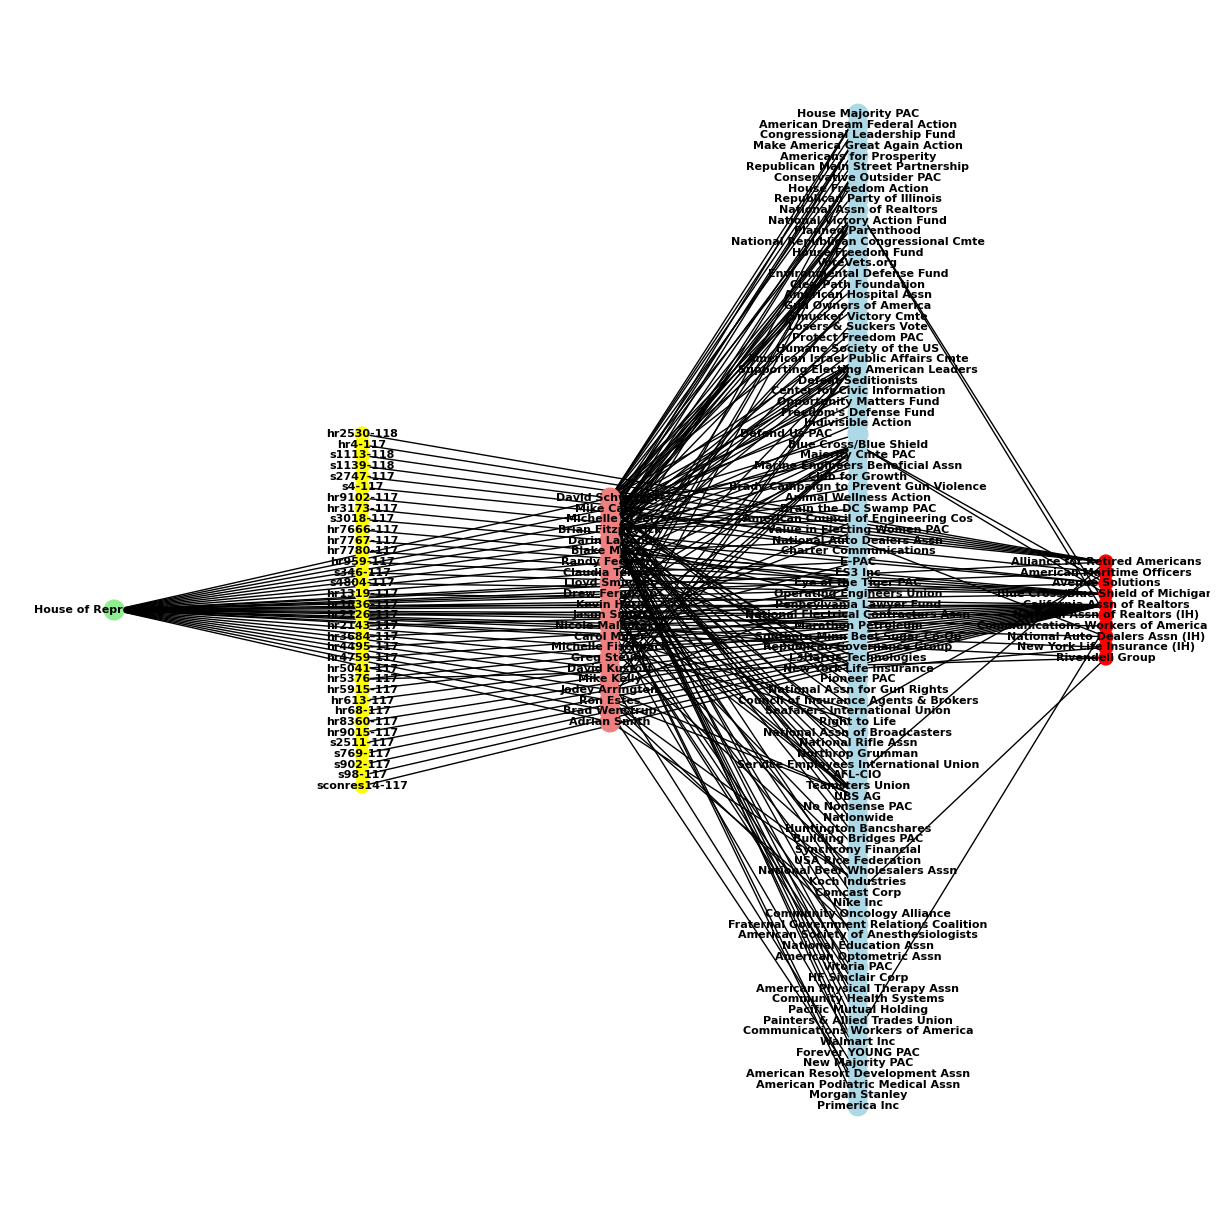

In [397]:
viz_graph(org_cand, org_reg, reg_agency, cand_agency, reg_bill)